# Feature Engineering
In questo corso imparerete a conoscere una delle fasi più importanti della costruzione di un grande modello di apprendimento automatico: **l'ingegneria delle caratteristiche**. Imparerete a:

- determinare quali sono le caratteristiche più importanti con l'informazione reciproca
- inventare nuove caratteristiche in diversi domini problematici del mondo reale
- codificare categoriali ad alta cardinalità con una codifica di destinazione
- creare caratteristiche di segmentazione con il clustering k-means
- decomporre la variazione di un set di dati in caratteristiche con l'analisi delle componenti principali.

## L'obiettivo del Feature Engineering
L'**obiettivo dell'ingegneria delle caratteristiche** è semplicemente quello di rendere i dati più adatti al problema in questione.

Consideriamo misure di "temperatura apparente" come l'indice di calore e il wind chill. Queste grandezze cercano di misurare la temperatura percepita dagli esseri umani in base alla temperatura dell'aria, all'umidità e alla velocità del vento, elementi che possiamo misurare direttamente. Si potrebbe pensare alla temperatura apparente come al risultato di una sorta di ingegneria delle caratteristiche, un tentativo di rendere i dati osservati più rilevanti per ciò che ci interessa davvero: come ci si sente all'esterno!

Si potrebbe eseguire **l'ingegneria delle caratteristiche** per:

- migliorare le prestazioni predittive di un modello
- ridurre le esigenze di calcolo o di dati
- migliorare l'interpretabilità dei risultati

Per essere utile, una caratteristica deve avere una relazione con l'obiettivo che il modello è in grado di apprendere. I **modelli lineari**, ad esempio, sono in grado di apprendere solo relazioni lineari. Pertanto, quando si utilizza un **modello lineare**, l'obiettivo è trasformare le caratteristiche per rendere lineare la loro relazione con l'obiettivo.

L'idea chiave è che la **trasformazione applicata a una caratteristica** diventa in sostanza una parte del modello stesso. Supponiamo che si stia cercando di prevedere il prezzo di appezzamenti di terreno quadrati a partire dalla lunghezza di un lato. L'**adattamento di un modello lineare** direttamente alla lunghezza dà scarsi risultati: la **relazione non è lineare**.

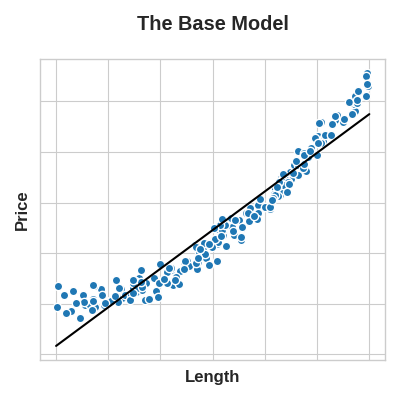

Tuttavia, se si eleva al quadrato la caratteristica Lunghezza per ottenere 'Area', si crea una **relazione lineare**. Aggiungendo Area al set di caratteristiche, il **modello lineare** può ora adattarsi a una parabola. In altre parole, l'elevazione al quadrato di una caratteristica ha dato al modello lineare la capacità di adattarsi a caratteristiche quadrate.

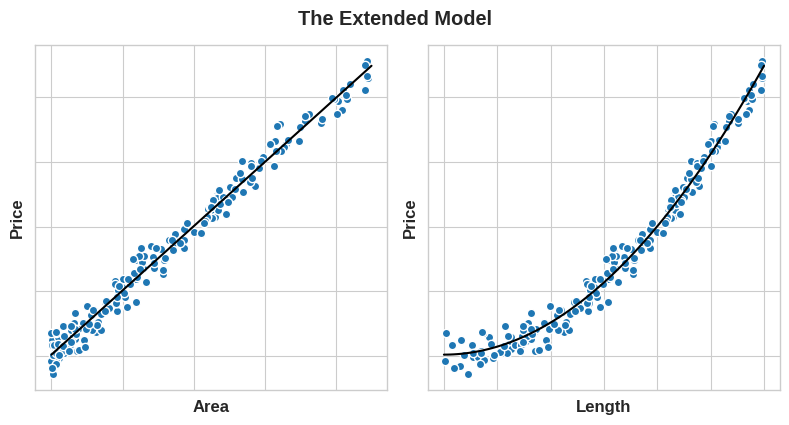

Questo dovrebbe far capire perché il tempo investito nell'**ingegnerizzazione delle funzioni** può avere un ritorno così elevato. Tutte le relazioni che il vostro modello non può apprendere, potete fornirle voi stessi attraverso le trasformazioni. Mentre sviluppate il vostro set di funzioni, pensate a quali informazioni il vostro modello potrebbe utilizzare per ottenere le migliori prestazioni.

### Esempio
**Formulazioni concrete**
Per illustrare queste idee, vedremo come l'aggiunta di alcune caratteristiche sintetiche a un set di dati possa migliorare le prestazioni predittive di un modello di foresta casuale.

Il _dataset Concrete_ contiene una serie di formulazioni di calcestruzzo e la resistenza alla compressione del prodotto risultante, che è una misura del carico che quel tipo di calcestruzzo può sopportare. Il compito di questo dataset è quello di prevedere la resistenza alla compressione di un calcestruzzo in base alla sua formulazione.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

df = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Feature Engineering/concrete.csv")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Qui si possono vedere i vari ingredienti che compongono ogni varietà di cemento. Tra poco vedremo come l'aggiunta di ulteriori caratteristiche sintetiche derivate da questi ingredienti possa aiutare un modello ad apprendere importanti relazioni tra di essi.

Per prima cosa stabiliremo una **linea di base** addestrando il modello sul set di dati non modificati. Questo ci aiuterà a determinare se le nostre nuove caratteristiche sono effettivamente utili.

Stabilire una **linea di base** come questa è una buona pratica all'inizio del processo di **feature engineering**. Un punteggio di base può aiutare a decidere se vale la pena mantenere le nuove funzioni o se è meglio scartarle e provare qualcos'altro.

In [2]:
X = df.copy()
y = X.pop("CompressiveStrength")

# Train and score baseline model
baseline = RandomForestRegressor(criterion="mae", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: Fu

MAE Baseline Score: 8.232


Chi cucina a casa sa che il rapporto tra gli ingredienti di una ricetta di solito predice meglio il risultato della ricetta stessa rispetto alle loro quantità assolute. Potremmo quindi pensare che i rapporti tra le caratteristiche di cui sopra siano un buon predittore della `CompressiveStrength`.

La cella sottostante aggiunge tre nuove caratteristiche di rapporto al set di dati.

In [3]:
X = df.copy()
y = X.pop("CompressiveStrength")

# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

# Train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion="mae", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")

E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
E:\Users\Alessio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: Fu

MAE Score with Ratio Features: 7.948


Di certo le prestazioni sono migliorate! Ciò dimostra che queste nuove caratteristiche del rapporto hanno esposto al modello informazioni importanti che prima non rilevava.

Abbiamo visto che l'**ingegnerizzazione di nuove caratteristiche** può migliorare le prestazioni del modello. Ma come si fa a identificare le caratteristiche del set di dati che potrebbero essere utili da combinare? Scoprite le caratteristiche utili con le informazioni reciproche.

## Mutual Information
La prima volta che si incontra un nuovo set di dati può sembrare opprimente. Potreste trovarvi di fronte a centinaia o migliaia di caratteristiche senza nemmeno una descrizione da cui partire. Da dove cominciare?

Un ottimo primo passo è quello di costruire una **classifica con una metrica di utilità delle caratteristiche**, una funzione che misura le associazioni tra una caratteristica e l'obiettivo. In questo modo si può scegliere un insieme più ristretto di caratteristiche più utili da sviluppare inizialmente e avere maggiore sicurezza che il tempo sarà speso bene.

La metrica che utilizzeremo si chiama "**informazione reciproca**". L'**informazione reciproca** è molto simile alla correlazione, in quanto misura una relazione tra due quantità. Il vantaggio dell'**informazione reciproca** è che può rilevare qualsiasi tipo di relazione, mentre la correlazione rileva solo relazioni lineari.

L'**informazione reciproca** è un'ottima metrica generale, particolarmente utile all'inizio dello sviluppo di una funzione, quando non si sa ancora quale modello utilizzare. È:

- facile da usare e da interpretare
- efficiente dal punto di vista computazionale
- teoricamente ben fondata,
- resistente all'overfitting e
- in grado di rilevare qualsiasi tipo di relazione

### L'informazione reciproca e le sue misure
L'**informazione reciproca** descrive le relazioni in termini di incertezza. L'**informazione reciproca** (**MI**) tra due grandezze è una misura della misura in cui la conoscenza di una grandezza riduce l'incertezza sull'altra. Se si conoscesse il valore di una caratteristica, quanto si sarebbe più sicuri dell'obiettivo?

Ecco un esempio tratto dai dati di Ames Housing. La figura mostra la relazione tra la qualità esterna di una casa e il prezzo di vendita. Ogni punto rappresenta una casa.

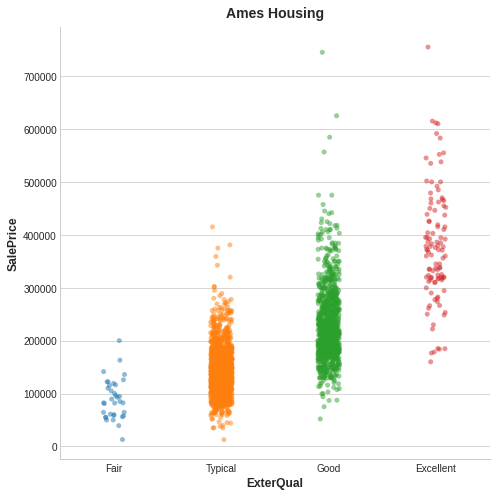

Dalla figura si evince che conoscere il valore di `ExterQual` dovrebbe rendere più certi i prezzi di vendita corrispondenti: ogni categoria di `ExterQual` tende a concentrare i prezzi di vendita entro un certo intervallo. L'informazione reciproca che `ExterQual` ha con `SalePrice` è la riduzione media dell'incertezza di `SalePrice` presa sui quattro valori di `ExterQual`. Poiché Fair si verifica meno spesso di `Typical`, ad esempio, `Fair` ha un peso minore nel punteggio **MI**.

(**Nota tecnica**: ciò che chiamiamo incertezza si misura con una grandezza della teoria dell'informazione nota come "entropia". L'entropia di una variabile significa all'incirca: "quante domande sì o no sono necessarie per descrivere un'occorrenza di quella variabile, in media". Più domande si devono fare, più la variabile è incerta. La mutua informazione è il numero di domande a cui ci si aspetta che la caratteristica risponda sull'obiettivo).

### Interpretazione dei punteggi di informazione reciproca
L'**informazione reciproca minima** possibile tra le grandezze è 0,0. Quando l'**informazione reciproca** è pari a zero, le grandezze sono indipendenti: nessuna delle due può dire nulla dell'altra. Al contrario, in teoria non esiste un **limite massimo di MI**. In pratica, però, i valori superiori a 2,0 o giù di lì sono poco comuni. (La mutua informazione è una quantità logaritmica, quindi aumenta molto lentamente).

La figura seguente dà un'idea di come i valori di **MI** corrispondano al tipo e al grado di associazione di una caratteristica con l'obiettivo.

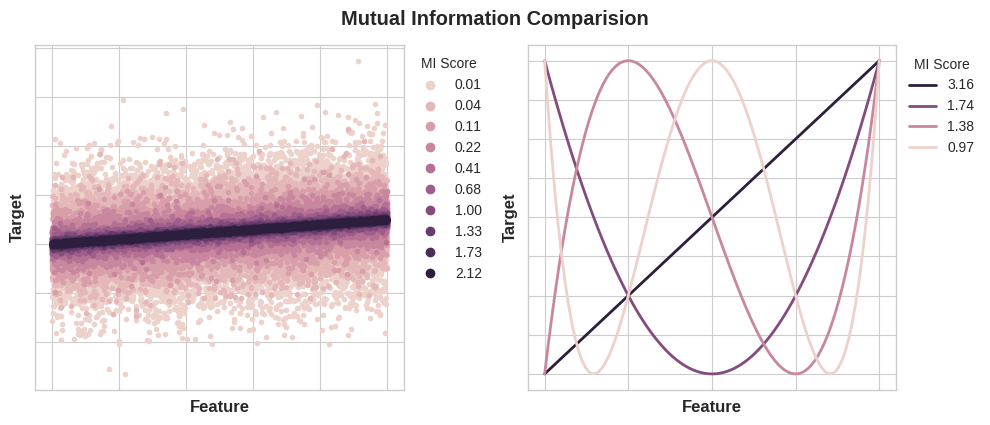

A sinistra: l'**informazione reciproca** aumenta quando la dipendenza tra la caratteristica e il bersaglio diventa più stretta. A destra: L'informazione reciproca può catturare qualsiasi tipo di associazione (non solo lineare, come la correlazione).
Ecco alcune cose da ricordare quando si applica l'informazione reciproca:

- MI può aiutare a capire il potenziale relativo di una caratteristica come predittore dell'obiettivo, considerato da solo.
- È possibile che una caratteristica sia molto informativa quando interagisce con altre caratteristiche, ma non altrettanto da sola. La MI non è in grado di rilevare le interazioni tra le caratteristiche. È una metrica univariata.
- L'utilità effettiva di una caratteristica dipende dal modello con cui viene utilizzata. Una caratteristica è utile solo nella misura in cui la sua relazione con l'obiettivo è in grado di essere appresa dal modello. Il fatto che una caratteristica abbia un punteggio MI elevato non significa che il modello sia in grado di fare qualcosa con quelle informazioni. Potrebbe essere necessario trasformare prima la caratteristica per esporre l'associazione.

### Esempio 
**Automobili del 1985**
Il set di dati Automobile è composto da 193 automobili dell'anno modello 1985. L'obiettivo di questo set di dati è prevedere il prezzo di un'auto (il target) a partire da 23 caratteristiche dell'auto, come la `make`, lo `body_style` e i `horsepower`. In questo esempio, classificheremo le caratteristiche con l'informazione reciproca e analizzeremo i risultati attraverso la visualizzazione dei dati.

Questa cella nascosta importa alcune librerie e carica il set di dati.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Feature Engineering/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


L'algoritmo **scikit-learn** per il MI tratta le caratteristiche discrete in modo diverso da quelle continue. Di conseguenza, è necessario dirgli quali sono. Come regola generale, tutto ciò che deve avere un tipo float non è discreto. Le caratteristiche categoriali (tipo oggetto o categoriale) possono essere trattate come discrete assegnando loro una codifica di etichetta. (Potete rivedere le codifiche delle etichette nella lezione sulle variabili categoriali).

In [5]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

**Scikit-learn** dispone di due metriche di informazione reciproca nel suo modulo feature_selection: una per gli **obiettivi a valore reale** (`mutual_info_regression`) e una per gli **obiettivi categorici** (`mutual_info_classif`). Il nostro obiettivo, il prezzo, è a valore reale. La cella successiva calcola i punteggi MI per le nostre caratteristiche e li racchiude in un bel dataframe.

In [6]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          0.912682
highway_mpg          0.879476
length               0.623844
fuel_system          0.457672
drive_wheels         0.333404
symboling            0.232796
compression_ratio    0.096989
fuel_type            0.047298
Name: MI Scores, dtype: float64

E ora un grafico a barre per facilitare i confronti:

In [7]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

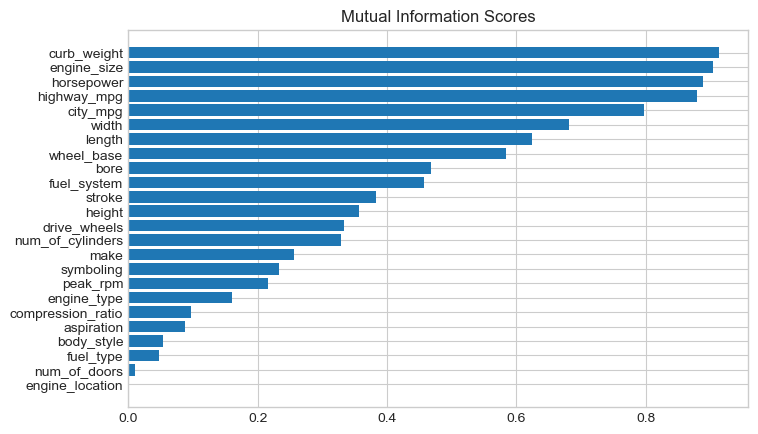

In [8]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

La visualizzazione dei dati è un ottimo seguito a una classifica di utilità. Vediamone un paio più da vicino.

Come ci si potrebbe aspettare, la caratteristica `curb_weight`, che ha ottenuto un punteggio elevato, mostra una forte relazione con il `price`, l'obiettivo.

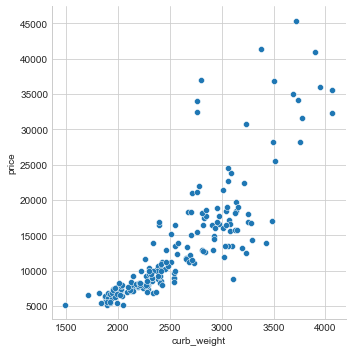

In [9]:
sns.relplot(x="curb_weight", y="price", data=df);

La caratteristica `fuel_type` ha un punteggio MI piuttosto basso, ma come possiamo vedere dalla figura, separa chiaramente due popolazioni di prezzi con tendenze diverse all'interno della caratteristica `horsepower`. Ciò indica che il `fuel_type` contribuisce a un effetto di interazione e potrebbe non essere irrilevante, dopo tutto. Prima di decidere che una caratteristica non è importante in base al suo punteggio MI, è bene indagare su ogni possibile effetto di interazione: la conoscenza del dominio può offrire molte indicazioni in questo senso.

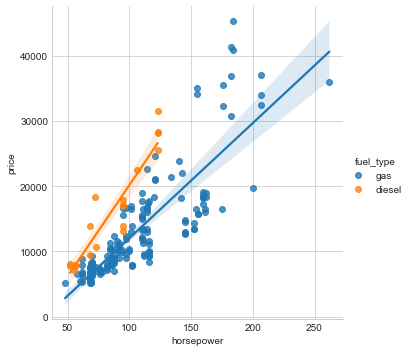

In [10]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);

La **visualizzazione dei dati** è un'ottima aggiunta alla vostra cassetta degli attrezzi per la progettazione di funzionalità. Oltre a metriche di utilità come le informazioni reciproche, visualizzazioni come queste possono aiutarvi a scoprire relazioni importanti nei vostri dati. Date un'occhiata al nostro corso sulla visualizzazione dei dati per saperne di più!

## Esercizi
In questo esercizio identificherete una serie iniziale di caratteristiche nel set di dati Ames da sviluppare utilizzando i punteggi di informazione reciproca e i grafici di interazione.

Eseguite questa cella per impostare tutto!

In [11]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.feature_engineering_new.ex2 import *

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [13]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [18]:
# Load data
df = pd.read_csv("D:/Users/Alessio/OneDrive/Python/Kaggle/Feature Engineering/ames.csv")

In [19]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

Per iniziare, rivediamo il significato di informazione reciproca esaminando alcune caratteristiche del set di dati Ames.

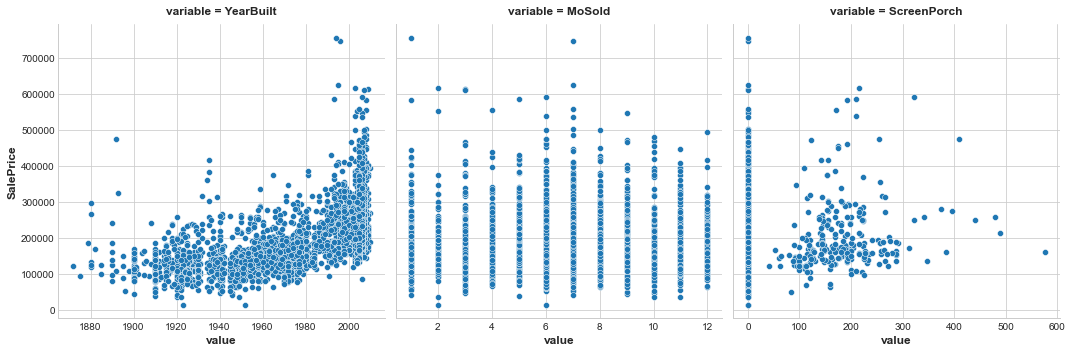

In [21]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

### Domanda 1
**Comprendere le informazioni reciproche**
In base ai grafici, quale caratteristica pensate che abbia la più alta informazione reciproca con `SalePrice`?

In [22]:
# View the solution (Run this cell to receive credit!)
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Based on the plots, `YearBuilt` should have the highest MI score since knowing the year tends to constrain `SalePrice` to a smaller range of possible values. This is generally not the case for `MoSold`, however. Finally, since `ScreenPorch` is usually just one value, 0, on average it won't tell you much about `SalePrice` (though more than `MoSold`) .

Il set di dati *Ames* ha settantotto caratteristiche: un sacco di cose da fare tutte insieme! Fortunatamente, è possibile identificare le caratteristiche con il maggior potenziale.

Utilizzate la funzione `make_mi_scores` (introdotta nel tutorial) per calcolare i punteggi di informazione reciproca per le caratteristiche di *Ames*:


In [23]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

Esaminate ora i punteggi utilizzando le funzioni in questa cella. Osservate in particolare i primi e gli ultimi posti.

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


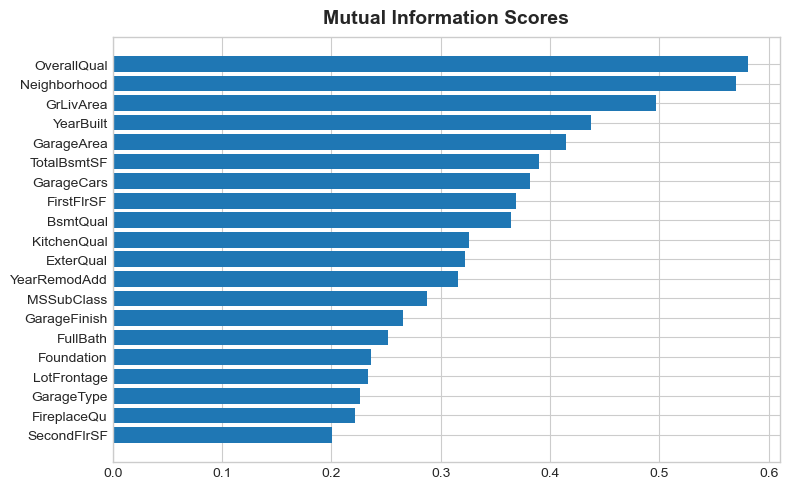

In [24]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

### Domanda 2
**Esaminare i punteggi del MI**

I punteggi sembrano ragionevoli? Le caratteristiche che hanno ottenuto i punteggi più alti rappresentano gli elementi che la maggior parte delle persone apprezzerebbe in una casa? Notate qualche tema in ciò che descrivono? 

In [25]:
# View the solution (Run this cell to receive credit!)
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Some common themes among most of these features are:
- Location: `Neighborhood`
- Size: all of the `Area` and `SF` features, and counts like `FullBath` and `GarageCars`
- Quality: all of the `Qual` features
- Year: `YearBuilt` and `YearRemodAdd`
- Types: descriptions of features and styles like `Foundation` and `GarageType`

These are all the kinds of features you'll commonly see in real-estate listings (like on Zillow), It's good then that our mutual information metric scored them highly. On the other hand, the lowest ranked features seem to mostly represent things that are rare or exceptional in some way, and so wouldn't be relevant to the average home buyer.


-------------------------------------------------------------------------------

In questo passo si analizzeranno i possibili effetti di interazione per la caratteristica `BldgType`. Questa caratteristica descrive la struttura generale dell'abitazione in cinque categorie:

> Bldg Type (Nominal): Type of dwelling
>		
>       1Fam	Single-family Detached	
>       2FmCon	Two-family Conversion; originally built as one-family dwelling
>       Duplx	Duplex
>       TwnhsE	Townhouse End Unit
>       TwnhsI	Townhouse Inside Unit

La caratteristica `BldgType` non ha ottenuto un punteggio MI molto alto. Un grafico conferma che le categorie di `BldgType` non fanno un buon lavoro nel distinguere i valori di `SalePrice` (in altre parole, le distribuzioni sono abbastanza simili):

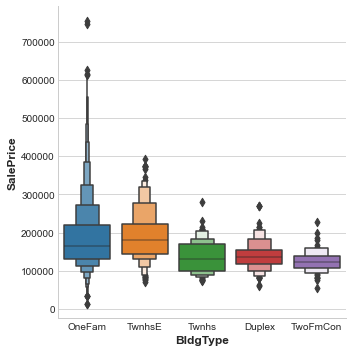

In [26]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

Tuttavia, il tipo di abitazione sembra essere un'informazione importante. Indagare se `BldgType` produce un'interazione significativa con uno dei seguenti elementi:

```
GrLivArea # Superficie abitabile fuori terra
MoSold # Mese di vendita
```

Eseguire la cella seguente due volte, la prima con `feature = "GrLivArea"` e la seconda con `feature="MoSold"`:

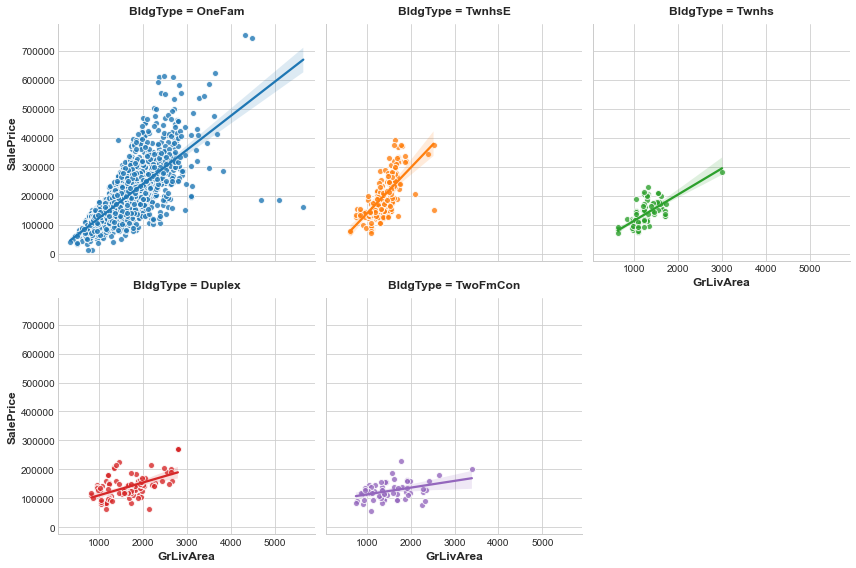

In [27]:
# YOUR CODE HERE: 
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

Le linee di tendenza significativamente diverse da una categoria all'altra indicano un effetto di interazione.

### Domanda 3
**Scoprire le interazioni**

Dai grafici, `BldgType` sembra mostrare un effetto di interazione con `GrLivArea` o `MoSold`?

In [28]:
# View the solution (Run this cell to receive credit!)
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The trends lines within each category of `BldgType` are clearly very different, indicating an interaction between these features. Since knowing `BldgType` tells us more about how `GrLivArea` relates to `SalePrice`, we should consider including `BldgType` in our feature set.

The trend lines for `MoSold`, however, are almost all the same. This feature hasn't become more informative for knowing `BldgType`.

Una prima serie di funzionalità di sviluppo

Prendiamoci un momento per stilare un elenco di caratteristiche su cui concentrarci. Nell'esercizio della Lezione 3, inizierete a costruire un insieme di funzionalità più informativo attraverso combinazioni delle funzionalità originali che avete identificato come ad alto potenziale.

Avete scoperto che le dieci caratteristiche con i punteggi MI più alti erano:

In [29]:
mi_scores.head(10)

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
Name: MI Scores, dtype: float64

Riconoscete i temi presenti? Posizione, dimensioni e qualità. Non è necessario limitare lo sviluppo solo a queste caratteristiche principali, ma ora avete un buon punto di partenza. La combinazione di queste caratteristiche principali con altre correlate, in particolare quelle che avete identificato come elementi che creano interazioni, è una buona strategia per ottenere un insieme di caratteristiche altamente informative su cui addestrare il vostro modello.